# Tractor Sales Forecasting

In [53]:
import pandas as pd
import numpy as np
import warnings
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from io import StringIO
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [54]:
tractor_data=pd.read_csv("Tractor-Sales.csv")
tractor_data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [55]:
tractor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [56]:
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(tractor_data))

In [57]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [58]:
tractor_data["Month"]=dates.month
tractor_data.head()

,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,1
1,Feb-03,157,2
2,Mar-03,185,3
3,Apr-03,199,4
4,May-03,203,5


In [59]:
tractor_data["year"]=dates.year
tractor_data.head()

,Month-Year,Number of Tractor Sold,Month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003


In [60]:
import calendar
tractor_data["Month"]=tractor_data["Month"].apply(lambda x: calendar.month_abbr[x])
tractor_data.head()

,Month-Year,Number of Tractor Sold,Month,year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [61]:
tractor_data.drop("Month-Year",axis=1,inplace=True)
tractor_data.head()

,Number of Tractor Sold,Month,year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [62]:
# Column rename
tractor_data.rename(columns={"Number of Tractor Sold":"Sales"},inplace=True)
tractor_data.head()

,Sales,Month,year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [63]:
tractor_data.set_index(dates,inplace=True)
tractor_data.head()

,Sales,Month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [64]:
df=tractor_data.copy()

In [65]:
df.drop(["Month","year"],axis=1,inplace=True)
df.head()

,Sales
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


In [66]:
from datetime import datetime

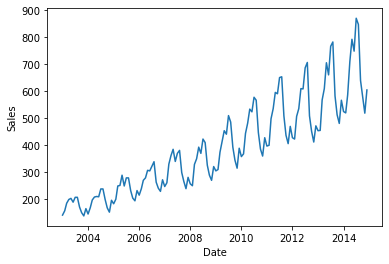

In [68]:
plt.xlabel("Date")
plt.ylabel("Sales")
plt.plot(df)

## Determining rolling statistics

In [75]:
rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()
print(rolmean,rolstd)

                 Sales
2003-01-01         NaN
2003-02-01         NaN
2003-03-01         NaN
2003-04-01         NaN
2003-05-01         NaN
...                ...
2014-08-01  645.583333
2014-09-01  650.333333
2014-10-01  656.000000
2014-11-01  659.166667
2014-12-01  662.333333

[144 rows x 1 columns]                  Sales
2003-01-01         NaN
2003-02-01         NaN
2003-03-01         NaN
2003-04-01         NaN
2003-05-01         NaN
...                ...
2014-08-01  140.409439
2014-09-01  139.057433
2014-10-01  134.254846
2014-11-01  130.136874
2014-12-01  128.137237

[144 rows x 1 columns]


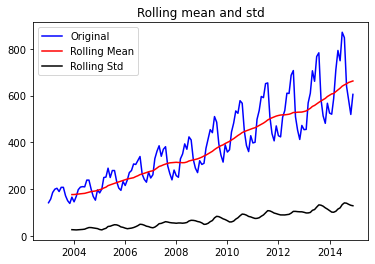

In [76]:
## plotting the rolling statistics
orig=plt.plot(df,color="blue",label="Original")
mean=plt.plot(rolmean, color="red",label="Rolling Mean")
std=plt.plot(rolstd, color="black",label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling mean and std")
plt.show()

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

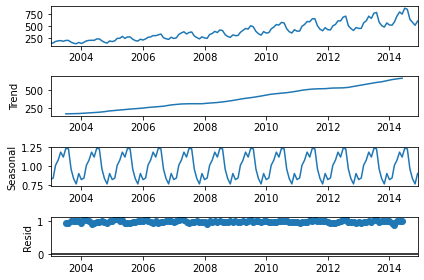

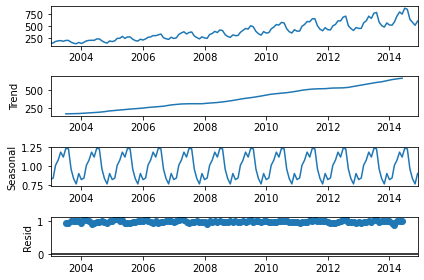

In [79]:
ts_decompose=seasonal_decompose(df, model="multilpicative",period=12)
ts_decompose.plot()

C:\Users\Bhuvan Kothari\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


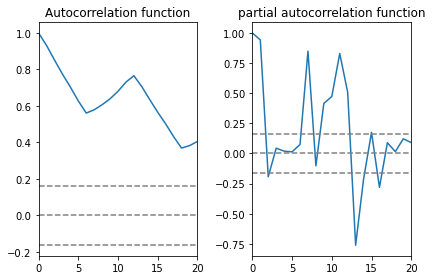

In [81]:
## plot ACF and PACF
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(df, nlags=20)
lag_pacf=pacf(df, nlags=20,method="ols")

## plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(df)), linestyle='--',color="gray")
plt.title("Autocorrelation function")
plt.xlim([0,20])


## plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color="gray")
plt.title("partial autocorrelation function")
plt.xlim([0,20])
plt.tight_layout()

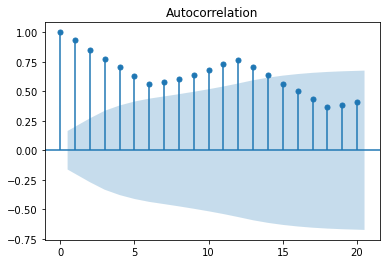

In [82]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_plot=plot_acf(df,lags=20)

In [83]:
## Null hypothesis rejected only for lag=1 (that is  auto_correlation is statistically significant)

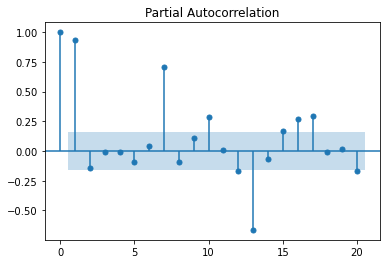

In [84]:
pacf_plot=plot_pacf(df,lags=20)

In [85]:
# define the d and q parameters to take any value between 0 and 1
q=d=range(0,2)
# Define the p parameters to take any value between 0 and 3
p=range(0,4)

# Generate all different combinations of p,d and q triplets
pdq=list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p, d, q))]

print("Examples of parameter combinations for seasonal ARIMA:-")
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA:-
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [86]:
warnings.filterwarnings("ignore")  # specify to ignore warning messages

AIC=[]
SARIMAX_model=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(df,
                                         order=param,
                                         seasonal_order=param_seasonal,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
            
            results=mod.fit()
            
            print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal,results.aic),end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param,param_seasonal])
        except:
            continue

In [87]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 799.9064282669918 for model SARIMAX(3, 1, 0)x(3, 1, 1, 12)


In [88]:
SARIMAX_model[AIC.index(min(AIC))][0]

(3, 1, 0)

In [89]:
SARIMAX_model[AIC.index(min(AIC))][1]

(3, 1, 1, 12)

In [90]:
mod=sm.tsa.statespace.SARIMAX(df,
                             order=SARIMAX_model[AIC.index(min(AIC))][0],
                             seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                             enforce_stationarity=False,
                             enforce_invertibility=False)

resulst=mod.fit()

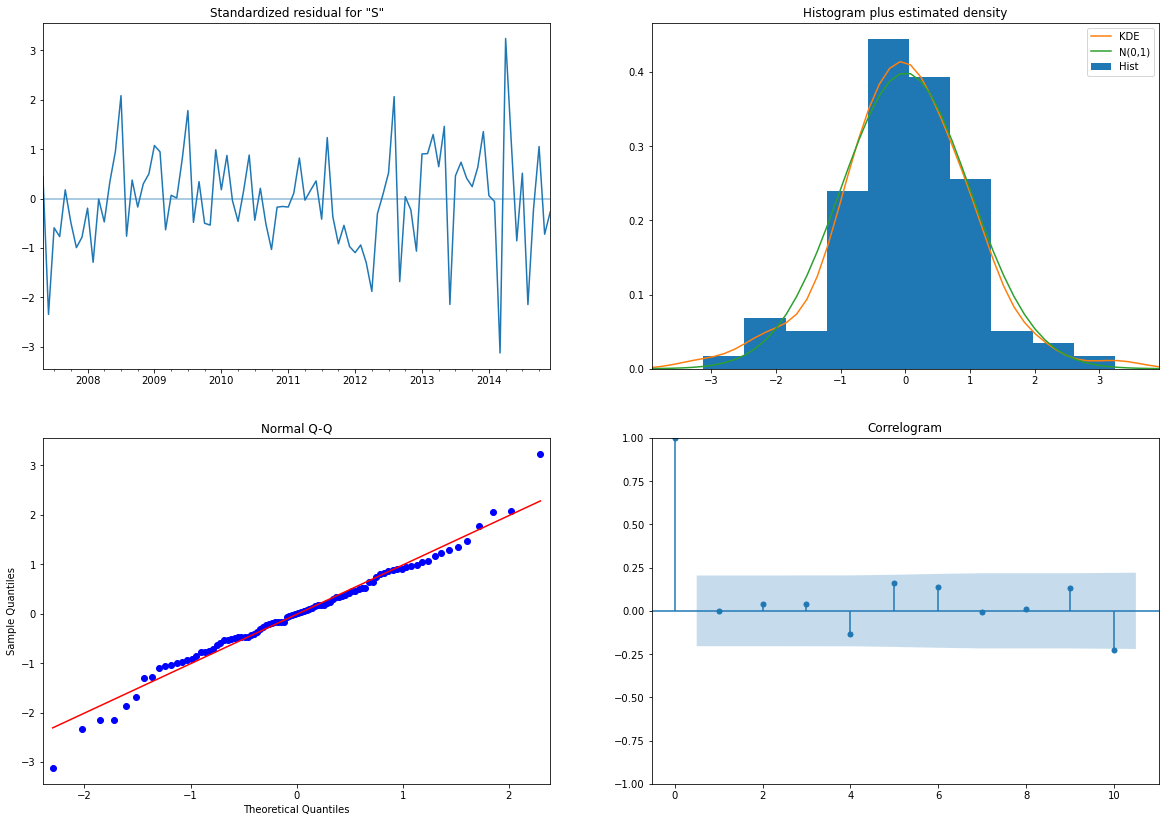

In [91]:
results.plot_diagnostics(figsize=(20,14))
plt.show()

In [92]:
df.tail()

,Sales
2014-08-01,848
2014-09-01,640
2014-10-01,581
2014-11-01,519
2014-12-01,605


In [93]:
df.head()

,Sales
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


In [95]:
pred1=results.get_prediction(start="2003-01-01",dynamic=False)
pred1_ci=pred1.conf_int()

In [97]:
pred2=results.get_forecast("2015-01-01")
pred2_ci=pred2.conf_int()

In [98]:
pred0=results.get_prediction(start="2003-01-01", dynamic=False)
pred0_ci=pred0.conf_int

pred1=results.get_prediction(start="2003-01-01", dynamic=True)
pred1_ci=pred1.conf_int

pred2=results.get_forecast("2016-01-01")
pred2_ci=pred2.conf_int()

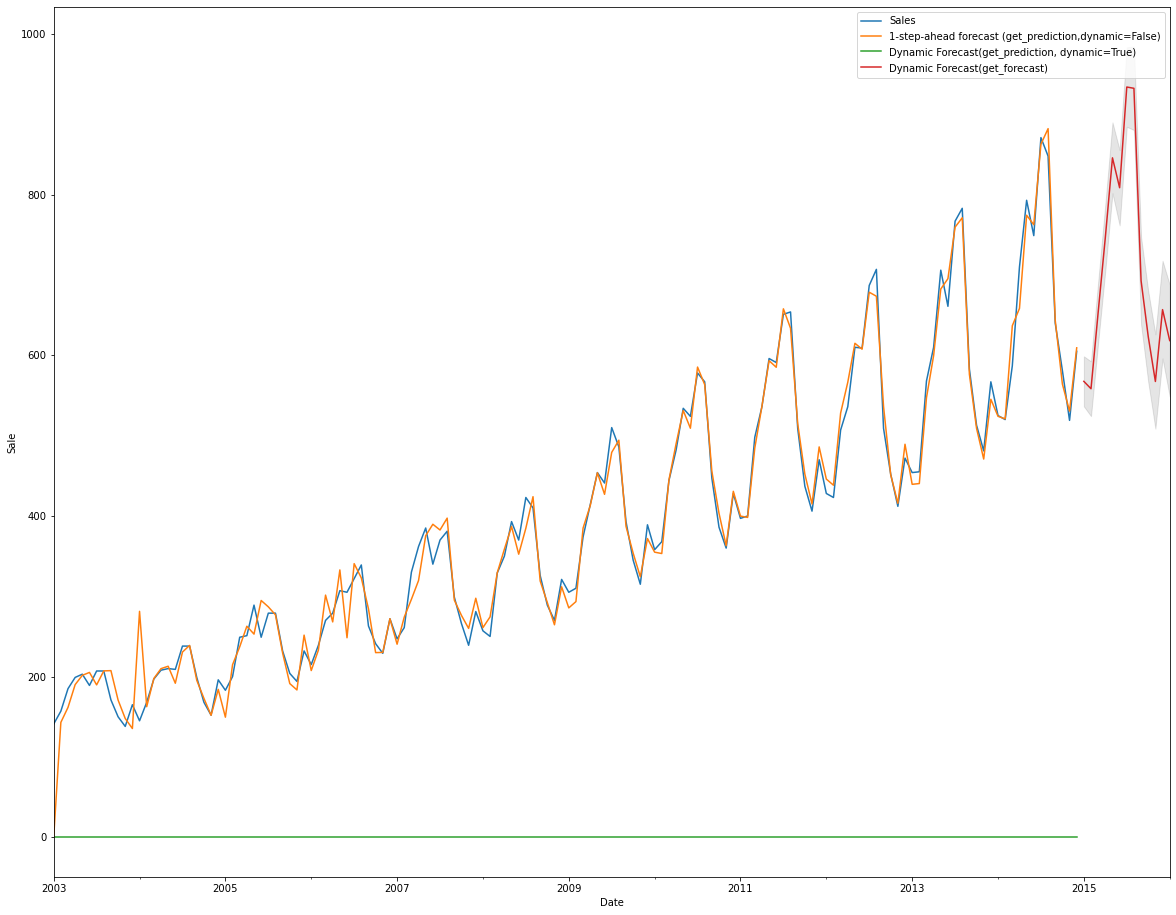

In [99]:
ax=df.plot(figsize=(20,16))
pred0.predicted_mean.plot(ax=ax,label="1-step-ahead forecast (get_prediction,dynamic=False)")
pred1.predicted_mean.plot(ax=ax,label="Dynamic Forecast(get_prediction, dynamic=True)")
pred2.predicted_mean.plot(ax=ax,label="Dynamic Forecast(get_forecast)")
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:,0],pred2_ci.iloc[:,1],color='k',alpha=0.1)
plt.xlabel("Date")
plt.ylabel("Sale")
plt.legend()
plt.show()

In [100]:
y_actual=df["Sales"]
y_pred=pred0.predicted_mean

In [101]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_actual,y_pred)
MAE

15.326496567665876

In [102]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_actual,y_pred)
MSE

589.0613379573246

In [104]:
RMSE=np.sqrt(MSE)
RMSE

24.270585859375636

In [105]:
RMSE=np.mean(np.abs((y_actual-y_pred)/y_actual))*100
RMSE

5.405517371287531